In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('data/penguins.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    int64  
 5   body_mass_g        342 non-null    int64  
 6   sex                342 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.8+ KB


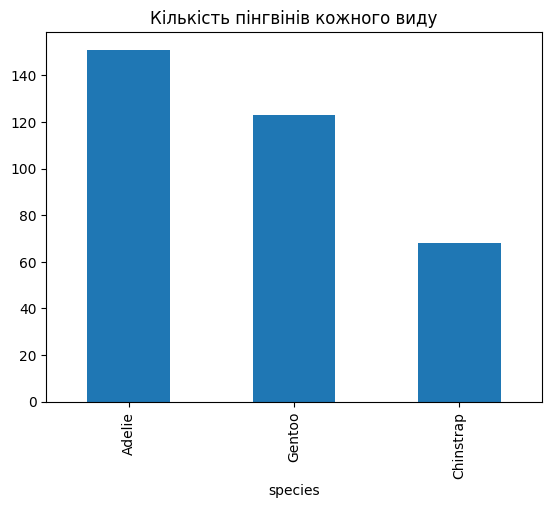

In [4]:
species_counts = df['species'].value_counts()
species_counts.plot(kind='bar')
plt.title('Кількість пінгвінів кожного виду')
plt.show()

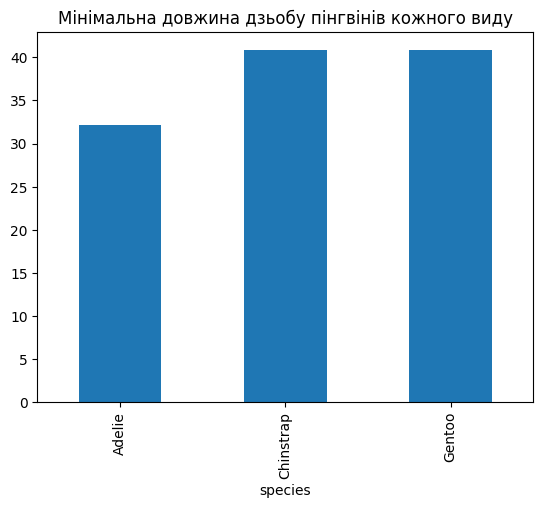

In [5]:
min_culmen_length = df.groupby('species')['culmen_length_mm'].min()
min_culmen_length.plot(kind='bar')
plt.title('Мінімальна довжина дзьобу пінгвінів кожного виду')
plt.show()

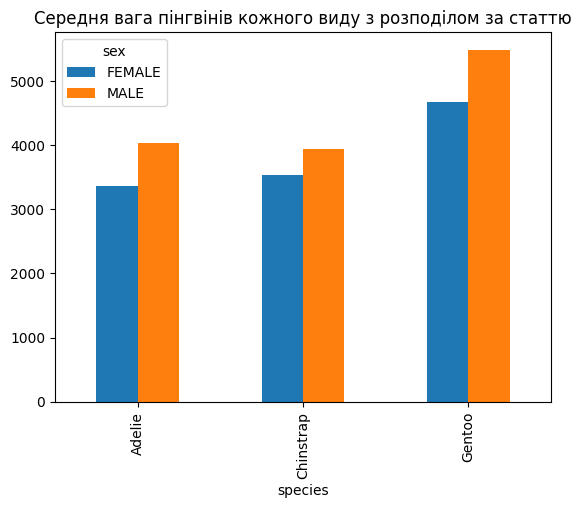

In [6]:
average_weight = df.groupby(['species', 'sex'])['body_mass_g'].mean()
average_weight.unstack().plot(kind='bar')
plt.title('Середня вага пінгвінів кожного виду з розподілом за статтю')
plt.show()

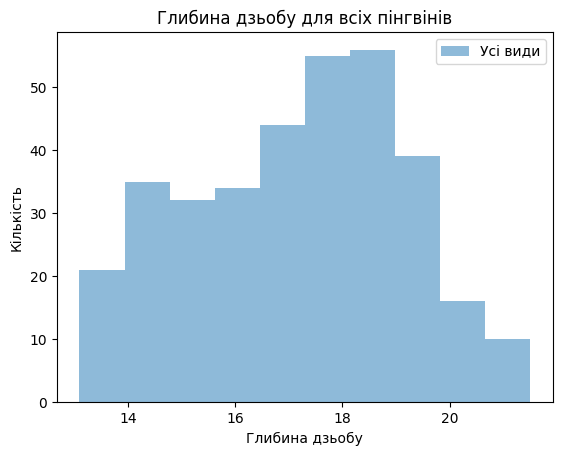

In [7]:
plt.hist(df['culmen_depth_mm'], alpha=0.5, label='Усі види') # bins?
plt.title('Глибина дзьобу для всіх пінгвінів')
plt.xlabel('Глибина дзьобу')
plt.ylabel('Кількість')
plt.legend()
plt.show()

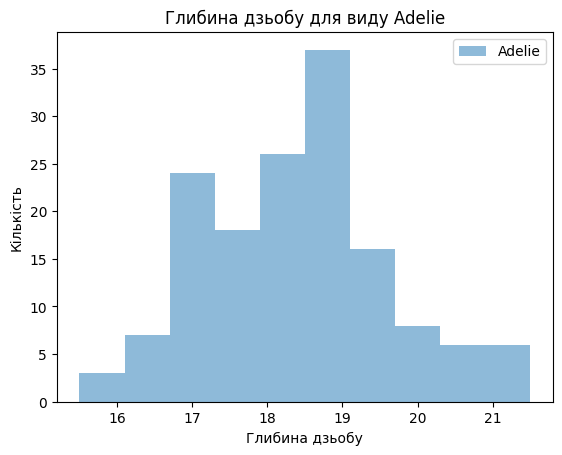

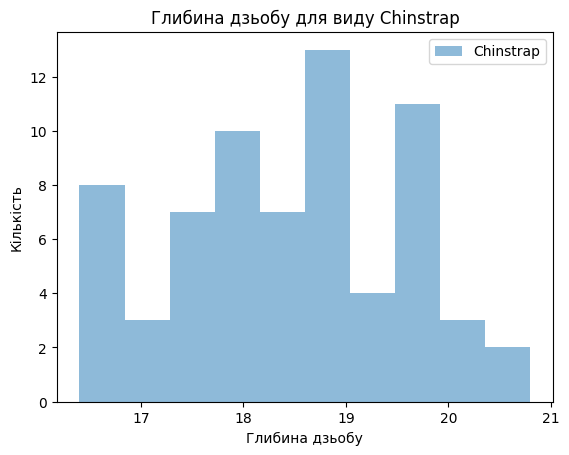

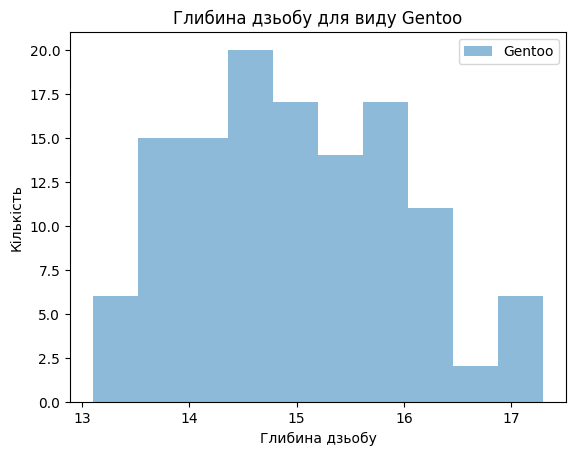

In [8]:
species = df['species'].unique()

for s in species:
    plt.figure()
    plt.hist(df[df['species'] == s]['culmen_depth_mm'], alpha=0.5, label=s)
    plt.title(f'Глибина дзьобу для виду {s}')
    plt.xlabel('Глибина дзьобу')
    plt.ylabel('Кількість')
    plt.legend()
    plt.show()

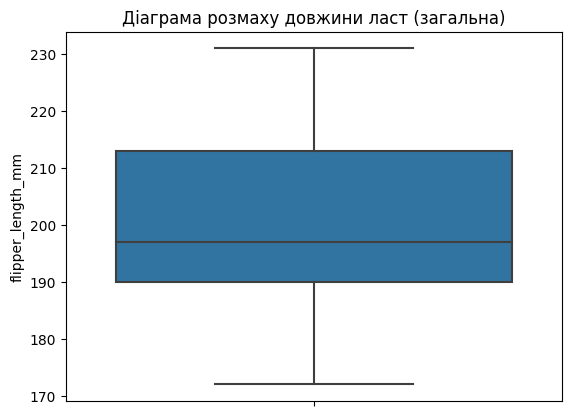

In [9]:
sns.boxplot(y=df['flipper_length_mm'])
plt.title('Діаграма розмаху довжини ласт (загальна)')
plt.show()

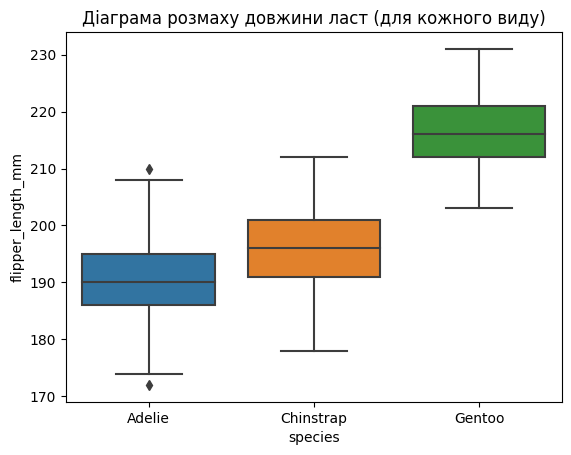

In [10]:
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('Діаграма розмаху довжини ласт (для кожного виду)')
plt.show()

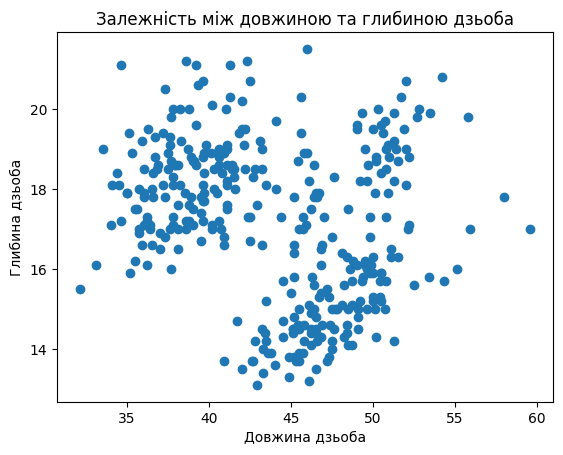

Коефіцієнт кореляції між довжиною та глибиною дзьоба: -0.2350528703555326


In [11]:
plt.scatter(df['culmen_length_mm'], df['culmen_depth_mm'])
plt.title('Залежність між довжиною та глибиною дзьоба')
plt.xlabel('Довжина дзьоба')
plt.ylabel('Глибина дзьоба')
plt.show()

corr_culmen = df['culmen_length_mm'].corr(df['culmen_depth_mm'])
print(f'Коефіцієнт кореляції між довжиною та глибиною дзьоба: {corr_culmen}')

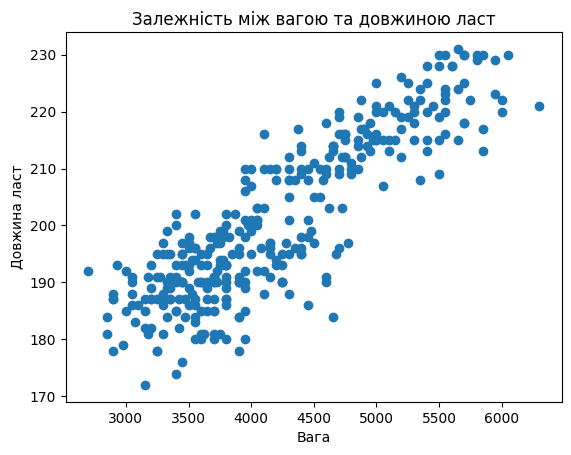

Коефіцієнт кореляції між вагою та довжиною ласт: 0.871201767306011


In [12]:
plt.scatter(df['body_mass_g'], df['flipper_length_mm'])
plt.title('Залежність між вагою та довжиною ласт')
plt.xlabel('Вага')
plt.ylabel('Довжина ласт')
plt.show()

corr_mass_flipper = df['body_mass_g'].corr(df['flipper_length_mm'])
print(f'Коефіцієнт кореляції між вагою та довжиною ласт: {corr_mass_flipper}')